# Intro to Neural Networks through SKFlow

<img src="https://pbs.twimg.com/media/CbccPCBWAAErTII.jpg"/>

By now, you've installed tensorflow as well as the sklearn-centric wrapper, SKFlow.

- To install tensorflow:

`conda install -c https://conda.anaconda.org/jjhelmus tensorflow=0.6.0`

- To install skflow afterwards:

`pip install skflow`

- Check that both components have correctly been installed in your ipython notebook:

`import skflow`

`import tensorflow as tf`

To adequately use TensorFlow would require a number of class sessions, but let's explore some of the basics through SKFlow.

In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn import cross_validation
import matplotlib.pyplot as plt
%matplotlib inline

import skflow
import tensorflow as tf

## Digit Recognition

We're going to use the digits dataset again. In reality, this is a subset of the classic MNIST database of handwritten digits. Overall, MNIST has 60,000 training examples, and a test set of 10,000 examples. 

Example algorithm performances (test error rate %):
- K Nearest Neighbors: 3%
- SVM with RBF kernel: 1.4%
- Boosted Stumps (depth=1 decision trees): 7.7%
- Boosted Trees: 1.53%

- 2 Layer NN: 4.7%
- Modified Convolutional Nets: < 1%

In [2]:
digits = datasets.load_digits()

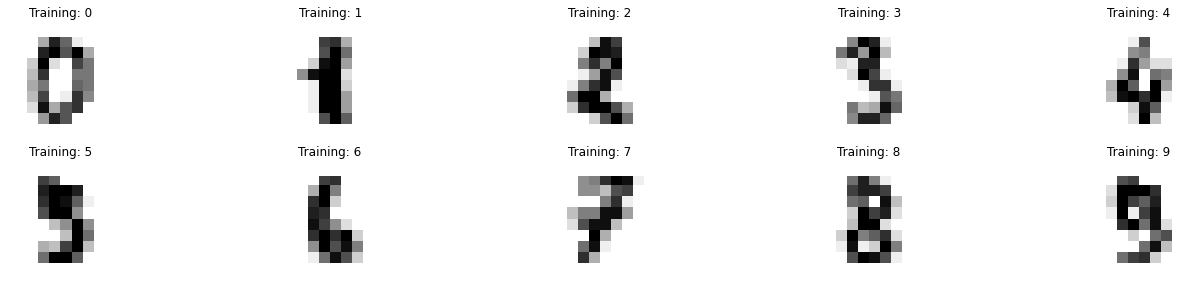

In [3]:
images_and_labels = zip( digits.images, digits.target )
plt.figure(figsize=(20,4))
for idx,(img,label) in enumerate(images_and_labels[:10]):
    plt.subplot(2,5,idx+1)
    plt.axis('off')
    plt.imshow(img,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title("Training: %i\n" % label)
plt.tight_layout()

To do classification using one of our familiar algorithms, we might run the following code (as well as splitting the data into training and test sets)

In [4]:
# Load dataset, split into train and test set
# Using half the data for test to make it harder

X_train, X_test, y_train, y_test = cross_validation.train_test_split(digits.data,digits.target,test_size=0.5)

In [5]:
# Going to scale all my data first
from sklearn import preprocessing

scaler = preprocessing.StandardScaler(with_mean=True,with_std=True)
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test  = scaler.transform(X_test)

In [6]:
from sklearn import neighbors

model_knn = neighbors.KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [7]:
score = metrics.accuracy_score(y_test, model_knn.predict(X_test))
print('Accuracy: {0:f}'.format(score))

Accuracy: 0.961068


### TensorFlowClassifier
Now, let's ease into SKFlow/Tensorflow by using a regular linear classifier

(Network diagram on the board)


In [8]:
model_tfl = skflow.TensorFlowClassifier(n_classes=10,steps=10000)
model_tfl.fit(X_train,y_train) 

Step #1, avg. loss: 2.61099
Step #1001, epoch #34, avg. loss: 0.18512
Step #2001, epoch #69, avg. loss: 0.05825
Step #3001, epoch #103, avg. loss: 0.03986
Step #4001, epoch #137, avg. loss: 0.02909
Step #5001, epoch #172, avg. loss: 0.02446
Step #6001, epoch #206, avg. loss: 0.02029
Step #7001, epoch #241, avg. loss: 0.01742
Step #8001, epoch #275, avg. loss: 0.01524
Step #9001, epoch #310, avg. loss: 0.01381


TensorFlowLinearClassifier(batch_size=32, class_weight=None,
              continue_training=False, early_stopping_rounds=None,
              keep_checkpoint_every_n_hours=10000, learning_rate=0.1,
              max_to_keep=5, n_classes=10, num_cores=4, optimizer='SGD',
              steps=10000, tf_master='', tf_random_seed=42, verbose=1)

In [9]:
score = metrics.accuracy_score(y_test, model_tfl.predict(X_test))
print('Accuracy: {0:f}'.format(score))

Accuracy: 0.963293


### TensorFlowDNNClassifier
Great, let's see what the same code looks like using a Deep Neural Network  with 2 hidden layers

(Network diagram on the board)

In [10]:
model_dnn = skflow.TensorFlowDNNClassifier(hidden_units=[20,15],
                                           n_classes=10,
                                           steps=10000)
model_dnn.fit(X_train,y_train)

Step #1, avg. loss: 2.91747
Step #1001, epoch #34, avg. loss: 0.17692
Step #2001, epoch #69, avg. loss: 0.00554
Step #3001, epoch #103, avg. loss: 0.00220
Step #4001, epoch #137, avg. loss: 0.00128
Step #5001, epoch #172, avg. loss: 0.00091
Step #6001, epoch #206, avg. loss: 0.00067
Step #7001, epoch #241, avg. loss: 0.00054
Step #8001, epoch #275, avg. loss: 0.00044
Step #9001, epoch #310, avg. loss: 0.00038


TensorFlowDNNClassifier(batch_size=32, class_weight=None,
            continue_training=False, early_stopping_rounds=None,
            hidden_units=[20, 15], keep_checkpoint_every_n_hours=10000,
            learning_rate=0.1, max_to_keep=5, n_classes=10, num_cores=4,
            optimizer='SGD', steps=10000, tf_master='', tf_random_seed=42,
            verbose=1)

In [13]:
score = metrics.accuracy_score(y_train, model_dnn.predict(X_train))
print('Accuracy: {0:f}'.format(score))

Accuracy: 1.000000


In [11]:
score = metrics.accuracy_score(y_test, model_dnn.predict(X_test))
print('Accuracy: {0:f}'.format(score))

Accuracy: 0.944383


In [14]:
# In TensorFlow, when we run and save the fitting to a directory
# We can call in a terminal
#   tensorboard --logdir=<THE_DIRECTORY>

model_dnn.fit(X_train,y_train,logdir="/tmp/blah")

Step #1, avg. loss: 2.91747
Step #1001, epoch #34, avg. loss: 0.17692
Step #2001, epoch #69, avg. loss: 0.00554
Step #3001, epoch #103, avg. loss: 0.00220
Step #4001, epoch #137, avg. loss: 0.00128
Step #5001, epoch #172, avg. loss: 0.00091
Step #6001, epoch #206, avg. loss: 0.00067
Step #7001, epoch #241, avg. loss: 0.00054
Step #8001, epoch #275, avg. loss: 0.00044
Step #9001, epoch #310, avg. loss: 0.00038


TensorFlowDNNClassifier(batch_size=32, class_weight=None,
            continue_training=False, early_stopping_rounds=None,
            hidden_units=[20, 15], keep_checkpoint_every_n_hours=10000,
            learning_rate=0.1, max_to_keep=5, n_classes=10, num_cores=4,
            optimizer='SGD', steps=10000, tf_master='', tf_random_seed=42,
            verbose=1)

Let's see a few of the examples where we were wrong with the predictions.

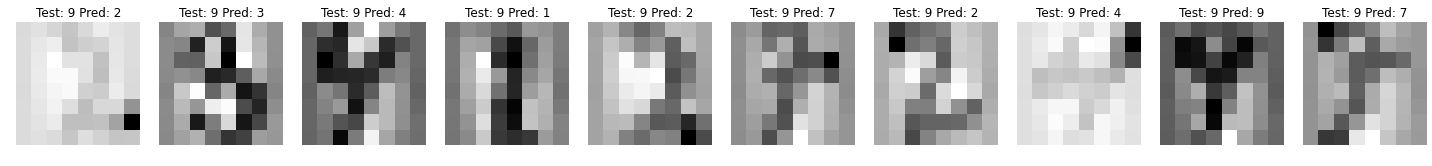

In [15]:
import numpy as np
plt.figure(figsize=(20,4))
cnt = 1
for img_idx in np.nditer( np.where( y_test != model_dnn.predict(X_test))[0][:10]):
    plt.subplot(1,10,cnt)
    plt.imshow(X_test[img_idx,:].reshape((8,8)),cmap=plt.cm.gray_r,interpolation='nearest')
    plt.axis('off')
    plt.title("Test: %i Pred: %i" % (label,y_test[img_idx]))
    cnt = cnt + 1
plt.tight_layout()

The true power comes in with custom models. TensorFlowEstimator allows you to specify your own conditions:
* activation function (sigmoid,tanh - hyperbolic tangent, relu - rectified linear unit, etc.)
* dropout (i.e. randomly drop out weights, should reduce overfitting)
* modified hidden layers

Example:
https://medium.com/@ilblackdragon/tensorflow-tutorial-part-2-9ffe47049c92#.l3ig75mjv

In [16]:
def my_model(X, y):
    """This is DNN with 20, 15 hidden layers, and dropout of 0.1 probability."""
    layers = skflow.ops.dnn(X, [20, 15],tf.tanh, keep_prob=0.9)
    return skflow.models.logistic_regression(layers, y)

model_cdnn = skflow.TensorFlowEstimator(model_fn=my_model, n_classes=10,steps=4000,learning_rate=0.3)
model_cdnn.fit(X_train,y_train)
score = metrics.accuracy_score(y_test, model_cdnn.predict(X_test))
print("Accuracy: %f" % score)

Step #1, avg. loss: 3.28346
Step #401, epoch #13, avg. loss: 0.31768
Step #801, epoch #27, avg. loss: 0.04370
Step #1201, epoch #41, avg. loss: 0.02460
Step #1601, epoch #55, avg. loss: 0.01851
Step #2001, epoch #69, avg. loss: 0.01458
Step #2401, epoch #82, avg. loss: 0.01170
Step #2801, epoch #96, avg. loss: 0.00907
Step #3201, epoch #110, avg. loss: 0.01123
Step #3601, epoch #124, avg. loss: 0.00810
Accuracy: 0.958843


Another example with a convolutional layer and a max pooling layer

In [17]:
def conv_model(X, y):
    X = tf.expand_dims(X, 3)
    features = tf.reduce_max(skflow.ops.conv2d(X, 12, [3, 3]), [1, 2])
    features = tf.reshape(features, [-1, 12])
    return skflow.models.logistic_regression(features, y)

# Create a classifier, train and predict.
classifier = skflow.TensorFlowEstimator(model_fn=conv_model, n_classes=10,
                                        steps=1000, learning_rate=0.2,
                                        batch_size=128)

classifier.fit(X_train.reshape((898,8,8)), y_train)
score = metrics.accuracy_score(classifier.predict(X_test.reshape((899,8,8))), y_test)
print('Accuracy: %f' % score)

Step #1, avg. loss: 3.56901
Step #101, epoch #12, avg. loss: 2.38305
Step #201, epoch #25, avg. loss: 1.82939
Step #301, epoch #37, avg. loss: 1.59679
Step #401, epoch #50, avg. loss: 1.31189
Step #501, epoch #62, avg. loss: 1.27337
Step #601, epoch #75, avg. loss: 1.23362
Step #701, epoch #87, avg. loss: 1.05782
Step #801, epoch #100, avg. loss: 1.03296
Step #901, epoch #112, avg. loss: 0.86913
Accuracy: 0.371524


Eventually, you will most likely want to just learn TensorFlow by itself, and then tie it into SKFlow as needed for fit/predict operations.


For some practice on Skflow, try the following modifications and exercises:
- (\*) **Easy**
- (\*\*) **Harder**
- (\*\*\*) **Hardest**

------

* (\*) Try modifying the number of steps as well as the learning rate. How does this affect your results insample and out of sample? Try looking at the TensorBoard results as well. [TensorBoard](https://www.tensorflow.org/versions/r0.7/how_tos/summaries_and_tensorboard/index.html)
* (\*) Try modifying the number of hidden layers as well as the size of the hidden layers. [This link on hidden layers](http://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw) may help you get a good feel.
* (\*) Rerun your own version of the TensorFlowClassifier on a different dataset. Compare against techniques such as KNN, SVM, or Logistic Regression.
* (\*\*) Try using a tf.relu activation function instead of sigmoid [List of various Activation Functions](https://www.tensorflow.org/versions/r0.7/api_docs/python/nn.html#activation-functions)
* (\*\*\*) Create a true TensorFlow model on the MNIST dataset [TensorFlow Example](https://www.tensorflow.org/versions/0.6.0/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners)
* (\*\*\*\*\*\*) Install and run through the [Theano tutorials](https://www.tensorflow.org/versions/0.6.0/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners)




* SKFlow tutorials: https://github.com/tensorflow/skflow
* More SKFLow examples: https://medium.com/@ilblackdragon/tensorflow-tutorial-part-2-9ffe47049c92#.h7fhs7nup
* Convolutional Neural Network guide: http://cs231n.github.io
* Understanding CNN: http://timdettmers.com/2015/03/26/convolution-deep-learning/


